In [45]:
import random

In [306]:
def environnement(x, y, var_x_y):
    reward     = 0
    new_x      = x + var_x_y[0]
    new_y      = y + var_x_y[1]

    if new_x<0 : new_x = 0
    if new_x>3 : new_x = 3
        
    if new_y<0 : new_y = 0
    if new_y>2 : new_y = 2
    
    if new_x ==2 and new_y==1 : reward=-10
    if new_x ==3 and new_y==2 : reward=+50
    
    est_fini = reward != 0
    
    return new_x, new_y, reward, est_fini        

In [317]:
aller_a_droite = [ 1 ,  0]
aller_a_gauche = [-1 ,  0]
aller_en_haut  = [ 0 ,  1]
aller_en_bas   = [ 0 , -1]
actions_possibles = {"aller_a_droite" : aller_a_droite, 
                     "aller_a_gauche" : aller_a_gauche, 
                     "aller_en_haut"  : aller_en_haut, 
                     "aller_en_bas"   : aller_en_bas }

# Test de l'environnement

aller_en_haut
2 0 aller_en_haut =>  2 1 reward =  -10 est_fini =  True


Text(2,0,'aller_en_haut')

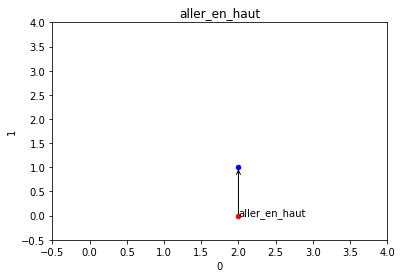

In [352]:
action_choisie = random.choice(list(actions_possibles.keys()))
print(action_choisie)
old_x = 2
old_y = 0
new_x, new_y, reward, est_fini = environnement(old_x,old_y, actions_possibles[action_choisie])
print(old_x, old_y, action_choisie , "=> ", new_x , new_y, "reward = ", reward, "est_fini = ", est_fini)

ax = pd.DataFrame([[new_x], [new_y]]).T.plot.scatter(x=0, y=1, color="blue", xlim=[-0.5, 4], ylim=[-0.5, 4], title=action_choisie)
pd.DataFrame([[old_x], [old_y]]).T.plot.scatter(x=0, y=1, ax=ax, color="red")
ax.annotate("", xy=(new_x, new_y), xytext=(old_x, old_y), arrowprops=dict(arrowstyle="->"))
ax.annotate(action_choisie, xy=(old_x, old_y))#,  arrowprops=dict(arrowstyle="->"))

# Q_value de base

In [335]:
def init_Q_value():
    x_possibles = range(4)
    y_possibles = range(3)

    positions_possibles =  [(x,y) for x in x_possibles for y in  y_possibles]
    Q_value             = {}
    for position_possible in positions_possibles:
        Q_value[position_possible] = {   "aller_a_droite" : 0 , 
                                         "aller_a_gauche" : 0 , 
                                         "aller_en_haut"  : 0 , 
                                         "aller_en_bas"   : 0 }
    return Q_value

# Créer des épisodes

In [336]:
def creer_episode_aleatoire(environnement, x_initial, y_initial, actions_possibles):
    est_fini = False
    steps    = []
    n        = -1
    while not est_fini:
        n +=1
        nom_action_choisie = random.choice(list(actions_possibles.keys()))
        action_choisie     = actions_possibles[nom_action_choisie]
        step               = environnement(x_initial,y_initial, action_choisie)
        new_x, new_y, reward, est_fini = step
        x_initial,y_initial = new_x, new_y
        steps.append([nom_action_choisie, step])
        if est_fini:
            return steps
        if n>1000:
            return steps

# Update ma Q_value

In [337]:
def update_q_value(Q_value, episode):
    actions_choisies = [x[0]     for x in episode]
    positions        = [x[1][:2] for x in episode]
    rewards          = [x[1][2]  for x in episode]
    somme_rewards    = sum(rewards)

    nb_de_position          = len(positions)
    influence_des_positions = []
    
    for indice_position, position in enumerate(positions) :
        gains_futurs = somme_rewards / (nb_de_position-indice_position)
        influence_des_positions.append(gains_futurs)

    for indice, _ in enumerate(positions):
        position = positions              [indice]
        action   = actions_choisies       [indice]
        valeur   = influence_des_positions[indice]
        Q_value[position][action] += valeur
        
    return Q_value

In [338]:
def get_reward_of_episode(episode):
    return sum ([x[1][2] for x in episode])

0.7117044407327138

In [546]:
good = new_episode.copy()
good2 = new_episode.copy()

0 0 aller_a_gauche


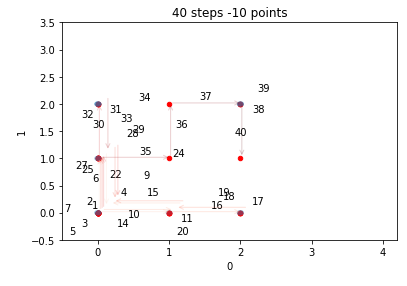

In [547]:

new_episode = draw_episode(creer_episode_aleatoire(environnement, 0, 0, actions_possibles))

In [470]:
r=0
while r<40:
    episode = creer_episode_aleatoire(environnement, 0, 0, actions_possibles)
    r = get_reward_of_episode(episode)

In [525]:
get_reward_of_episode(episode)

50

In [538]:
def draw_episode(episode):
    from collections import defaultdict
    from matplotlib import pyplot as plt
    import matplotlib
    actions_choisies = [x[0]     for x in episode]
    positions        = [(0,0)] + [x[1][:2] for x in episode]
    rewards          = [x[1][2]  for x in episode]
    sum_reward       = sum(rewards)
    cmap             = plt.cm.Reds
    norm           = matplotlib.colors.Normalize(vmin=0, vmax=len(rewards)/100)
    action_choisie = actions_choisies[0]
    old_x, old_y   = positions[0]
    
    print(old_x, old_y, action_choisie)
    title = str(len(episode)) + " steps " + str(sum_reward) + " points"
    ax = pd.DataFrame([[old_x], [old_y]]).T.plot.scatter(x=0, y=1, color="blue", xlim=[-0.5, 4.2], ylim=[-0.5, 3.5], title=title)
    #ax.annotate(action_choisie, xy=(old_x, old_y))#,

    epsilon_x = 0.0
    epsilon_y = 0.0
    def f():
        return 0
    epsilons = defaultdict(f)
    for i in range(1, len(positions)):  
        new_x, new_y         = positions[i]
        epsilons[tuple(positions[i])] = epsilons[tuple(positions[i])] + 0.02
        epsilon_x = epsilons[tuple(positions[i])]
        epsilon_y = epsilons[tuple(positions[i])]
        try:
            action_choisie = actions_choisies[i]
        except:
            pass

        pd.DataFrame([[new_x], [new_y]]).T.plot.scatter(x=0, y=1, ax=ax, color="red")
        if new_x == old_x and old_y==new_y:
            circle = plt.Circle((new_x, new_y), 0.05,  clip_on=False, fill=True, alpha=i/100)
            ax.add_artist(circle)
        ax.annotate("", 
                    xy     =(new_x+epsilon_x, new_y+epsilon_y), 
                    xytext =(old_x+epsilon_x, old_y+epsilon_y), 
                    arrowprops=dict(arrowstyle="->", color=cmap(norm(i/100), alpha=0.2)))

        middle_x = (new_x + old_x )/2 + epsilon_x*random.choice([-1, 1])*4
        middle_y = (new_y + old_y )/2 + epsilon_y*random.choice([-1, 1])*4
        ax.annotate(i, xy=(middle_x, middle_y))#,  arrowprops=dict(arrowstyle="->"))
        old_x, old_y = new_x, new_y
    return episode

0 0 aller_a_gauche


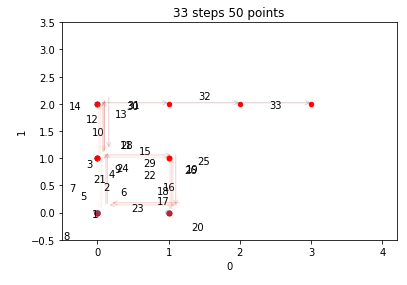

In [528]:
draw_episode(episode)

In [490]:
epsilons

defaultdict(<function __main__.f()>,
            {(0, 0): 0.44999999999999996,
             (0, 1): 0.39999999999999997,
             (0, 2): 0.25,
             (1, 1): 0.15000000000000002,
             (1, 0): 0.25,
             (1, 2): 0.05,
             (2, 2): 0.05})

In [270]:
# epoch 0
Q_value = init_Q_value()
for i in range(30):
    print("== == "*10)
    print("epoch", i, "reward = ", get_reward_of_episode(episode))
    print(pd.DataFrame(Q_value))
    
    episode = creer_episode_aleatoire(environnement, 0, 0, actions_possibles)
    Q_value = update_q_value(Q_value, episode)
    
    

== == == == == == == == == == == == == == == == == == == == 
epoch 0 reward =  50
                0        1        2        3      
                0  1  2  0  1  2  0  1  2  0  1  2
aller_a_droite  0  0  0  0  0  0  0  0  0  0  0  0
aller_a_gauche  0  0  0  0  0  0  0  0  0  0  0  0
aller_en_bas    0  0  0  0  0  0  0  0  0  0  0  0
aller_en_haut   0  0  0  0  0  0  0  0  0  0  0  0
== == == == == == == == == == == == == == == == == == == == 
epoch 1 reward =  -10
                       0                          1               2        \
                       0      1         2         0  1         2  0     1   
aller_a_droite  0.000000  0.000  0.000000 -0.526316  0 -4.935897  0   0.0   
aller_a_gauche -1.088235  0.000 -5.456710  0.000000  0  0.000000  0   0.0   
aller_en_bas   -0.476190 -1.250  0.000000 -0.555556  0  0.000000  0 -10.0   
aller_en_haut   0.000000 -0.625 -3.206349  0.000000  0 -3.333333  0   0.0   

                     3        
                  2  0  1  2  
alle

epoch 29 reward =  -10
                        0                                1             \
                        0          1          2          0          1   
aller_a_droite   0.000000   0.000000   0.000000 -28.060097 -15.192982   
aller_a_gauche -38.258219 -25.018587 -16.818332  -5.969697   0.000000   
aller_en_bas   -51.915393  -0.420996   0.000000 -31.139814 -22.500000   
aller_en_haut    0.000000 -22.611309 -23.991449   0.000000 -26.666936   

                                   2                            3            \
                        2          0      1          2          0         1   
aller_a_droite -26.719581 -31.273805 -110.0   4.583333 -17.208333  0.000000   
aller_a_gauche  -2.434783 -20.166667  -10.0   0.000000   0.000000  0.000000   
aller_en_bas     0.000000 -18.147870  -70.0   0.000000 -19.068755  0.000000   
aller_en_haut    1.335931   0.000000  -80.0  25.000000   0.000000 -9.019231   

                       
                    2  
aller_a_droite 

In [273]:
def get_policy(Q_value):
    pass

'aller_a_droite'

In [288]:
def get_policy(Q_value):
    policy = {}
    for position, actions in Q_value.items():
        meilleure_action =  max(actions, key=actions.get)
        policy[position] = meilleure_action
    return policy

In [290]:
policy = get_policy(Q_value)

In [294]:
policy.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)])

'aller_a_droite'

In [305]:
x_actuel = 0
y_actuel = 0
nb_de_coup = -1
max = 100
while not fini:
    nb_de_coup += 1
    nom_action_choisie  = policy[(x_actuel,y_actuel)]
    print(x_actuel,y_actuel, nom_action_choisie, "=>", end="")
    step = environnement(x_actuel,y_actuel, actions_possibles[nom_action_choisie])
    x_actuel, y_actuel, reward, fini = step
    print(x_actuel, y_actuel)
    if nb_de_coup > max:
        break
    
nb_de_coup

0 0 aller_a_droite =>1 0
1 0 aller_en_haut =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1 1 aller_a_gauche =>0 1
0 1 aller_a_droite =>1 1
1

101

In [291]:
policy

{(0, 0): 'aller_a_droite',
 (0, 1): 'aller_a_droite',
 (0, 2): 'aller_a_droite',
 (1, 0): 'aller_en_haut',
 (1, 1): 'aller_a_gauche',
 (1, 2): 'aller_en_bas',
 (2, 0): 'aller_en_haut',
 (2, 1): 'aller_a_gauche',
 (2, 2): 'aller_en_haut',
 (3, 0): 'aller_a_gauche',
 (3, 1): 'aller_a_droite',
 (3, 2): 'aller_a_droite'}

# Dessiner un épisode

In [88]:
def draw_episode(episode):
    import pandas as pd
    points = [x[1][:2] for x in episode]
    df = pd.DataFrame(points)
    %matplotlib inline
    df.plot.scatter(x=0, y=1, alpha=0.2, xlim=[-0.5,3.5], ylim=[-0.5,2.5])

[['aller_en_haut', (0, 1, 0, False)],
 ['aller_en_haut', (0, 2, 0, False)],
 ['aller_a_gauche', (0, 2, 0, False)],
 ['aller_en_haut', (0, 2, 0, False)],
 ['aller_en_haut', (0, 2, 0, False)],
 ['aller_en_bas', (0, 1, 0, False)],
 ['aller_en_bas', (0, 0, 0, False)],
 ['aller_a_droite', (1, 0, 0, False)],
 ['aller_en_haut', (1, 1, 0, False)],
 ['aller_en_bas', (1, 0, 0, False)],
 ['aller_en_bas', (1, 0, 0, False)],
 ['aller_en_bas', (1, 0, 0, False)],
 ['aller_en_bas', (1, 0, 0, False)],
 ['aller_a_gauche', (0, 0, 0, False)],
 ['aller_en_haut', (0, 1, 0, False)],
 ['aller_a_droite', (1, 1, 0, False)],
 ['aller_a_droite', (2, 1, -10, True)]]

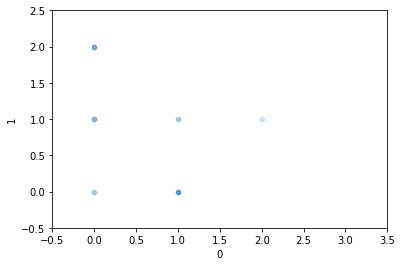

In [89]:
draw_episode(episode)
episode

# Trash

In [245]:
def creer_episode_selon_Q_value(environnement, x_initial, y_initial, actions_possibles, 
                                Q_value):
    est_fini = False
    steps = []
    n  = -1
    import numpy
    import math
    
    while not est_fini:
        n +=1
        actions_a_choisir  = list(actions_possibles.keys())
        # Pondération des actions selon leur valeur attendue
        valeurs_par_action = Q_value[(x_initial, y_initial)] 
        list_val           = valeurs_par_action.values()
        somme_des_valeurs  = abs(sum(list_val))
        probas_de_valeur   = [ 1 + x/somme_des_valeurs if x>0 else x for x in list_val]
        # choix pondéré
        if sum(probas_de_valeur)==0:
            probas_de_valeur = [1/4,1/4,1/4,1/4]
        else:
            sum_probas_de_valeur   = sum(probas_de_valeur)
            probas_de_valeur       = [x/sum_probas_de_valeur for x in probas_de_valeur]
        
        print("probas_de_valeur = ", probas_de_valeur)
        nom_action_choisie = numpy.random.choice(actions_a_choisir, p=probas_de_valeur)
        action_choisie     = actions_possibles[nom_action_choisie]
        step               = environnement(x_initial,y_initial, action_choisie)
        new_x, new_y, reward, est_fini = step
        x_initial,y_initial = new_x, new_y
        steps.append([nom_action_choisie, step])
        if est_fini:
            return steps
        if n>1000:
            return steps